**Chapter 1 - The Machine Learning landscape**

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%matplotlib inline

In [20]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [12]:
datapath = os.path.join("dataset", "")

import pandas as pd
import sklearn.linear_model

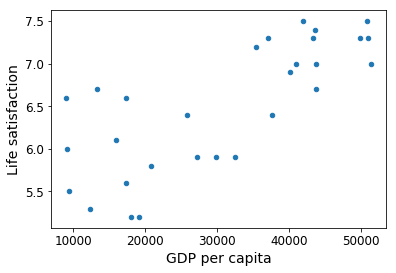

[[6.18443854]]


In [21]:
# load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2017.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [17]:
oecd_bli.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3398.0,0.0,0.0,3398.000000
mean,0.0,NaN,NaN,5353.200309
std,0.0,NaN,NaN,15832.099269
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,7.000000
50%,0.0,NaN,NaN,62.000000
75%,0.0,NaN,NaN,91.000000
max,0.0,NaN,NaN,176076.000000
